# Project Name: Sentiment Analysis on Tweets

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Load Data

In [2]:
train_df = pd.read_csv("twitter_training.csv", encoding="latin-1")
print(train_df.head())

   2401  Borderlands  Positive   
0  2401  Borderlands  Positive  \
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
val_df = pd.read_csv("twitter_validation.csv", encoding="latin-1")
print(val_df.head())

   3364   Facebook Irrelevant   
0   352     Amazon    Neutral  \
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                               
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                               
2  CSGO matchmaking i

In [4]:
print(val_df.columns)

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£'],
      dtype='object')


In [5]:
train_df.columns = ["id", "entity", "sentiment", "text"]
val_df.columns = ["id", "entity", "sentiment", "text"]

In [6]:
print(train_df.head())
print(train_df.columns)

     id       entity sentiment   
0  2401  Borderlands  Positive  \
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
Index(['id', 'entity', 'sentiment', 'text'], dtype='object')


Preprocess Tweets

In [7]:
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

In [17]:
print(train_df['label'].isnull().sum())
print(val_df['label'].isnull().sum())

18318
285


In [18]:
train_df = train_df.dropna(subset=['label', 'clean_text'])
val_df = val_df.dropna(subset=['label', 'clean_text'])


In [19]:
train_df['label'] = train_df['label'].astype(int)
val_df['label'] = val_df['label'].astype(int)


In [8]:
train_df["clean_text"] = train_df["text"].apply(clean_tweet)
val_df["clean_text"] = val_df["text"].apply(clean_tweet)

In [ ]:
val_df['clean_text'] = val_df['text'].apply(clean_tweet)

Map Sentiment to Numeric Labels (column index 2)

In [9]:
label_map = {'Negative':0, 'Irrelevant':1, 'Positive':2}


In [10]:
train_df['label'] = train_df.iloc[:, 2].map(label_map)


In [11]:
val_df['label'] = val_df.iloc[:, 2].map(label_map)

Visualize Sentiments 

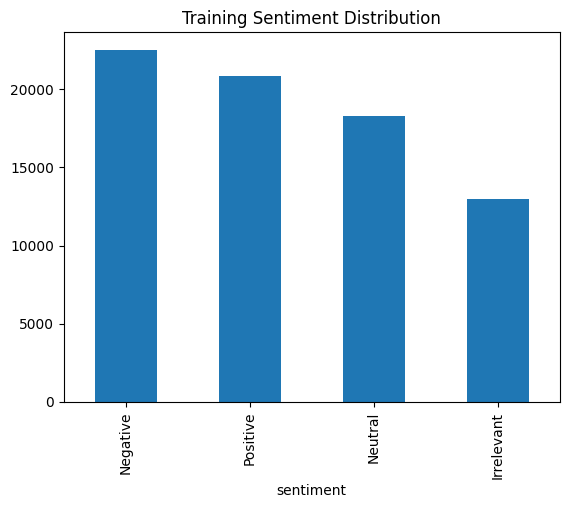

In [12]:
train_df.iloc[:,2].value_counts().plot(kind='bar', title='Training Sentiment Distribution')
plt.show()

Word cloud for positive tweets

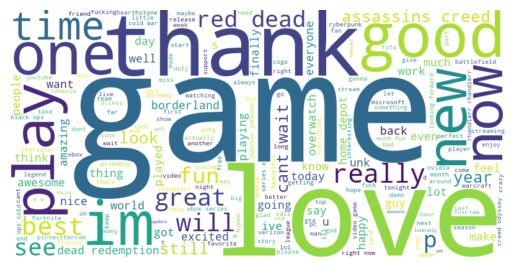

In [13]:
positive_words = ' '.join(train_df[train_df['label']==2]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Extraction

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_val = vectorizer.transform(val_df['clean_text'])

In [21]:
y_train = train_df['label']
y_val = val_df['label']


Train Logistic Regression

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_val)


Evaluate Model

In [24]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.865546218487395

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       266
           1       0.91      0.73      0.81       171
           2       0.86      0.90      0.88       277

    accuracy                           0.87       714
   macro avg       0.87      0.85      0.86       714
weighted avg       0.87      0.87      0.86       714



Confusion Matrix

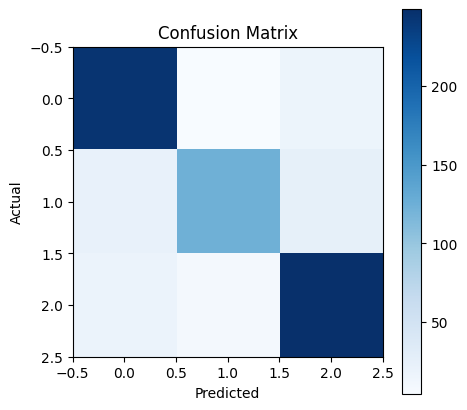

In [25]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.colorbar()
plt.show()

Custom Tweet Prediction

In [26]:
def predict_sentiment(tweet):
    tweet_clean = clean_tweet(tweet)
    vec = vectorizer.transform([tweet_clean])
    pred = model.predict(vec)[0]
    return {0: "Negative", 1: "Irrelevant", 2: "Positive"}[pred]


In [27]:
print(predict_sentiment("I love using machine learning for fun projects!"))
print(predict_sentiment("This game is terrible and boring..."))

Positive
Negative
